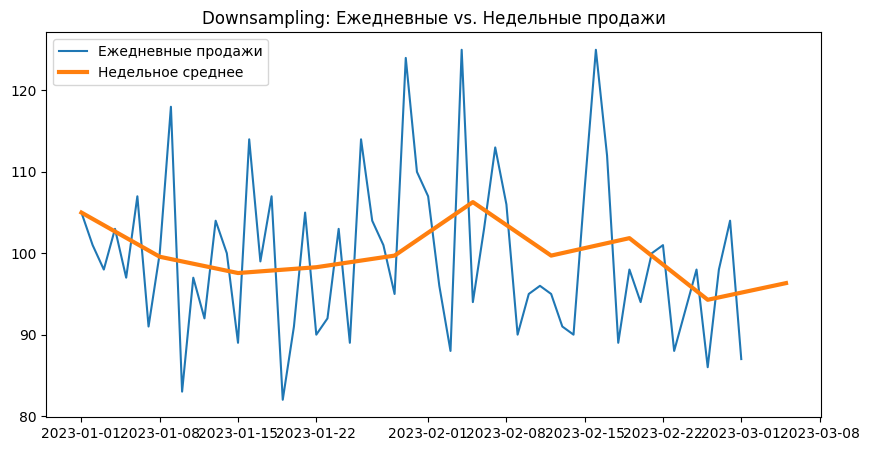

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# Создадим временной ряд: продажи за 60 дней
date_range = pd.date_range(start='2023-01-01', periods=60, freq='D')
sales = np.random.poisson(lam=100, size=60)
df = pd.DataFrame({'date': date_range, 'sales': sales})
df.set_index('date', inplace=True)
 
# Downsampling: из дневных в недельные, усредненные значения
weekly = df.resample('W').mean()
 
# Построим графики
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['sales'], label='Ежедневные продажи')
plt.plot(weekly.index, weekly['sales'], label='Недельное среднее', linewidth=3)
plt.legend()
plt.title('Downsampling: Ежедневные vs. Недельные продажи')
plt.show()

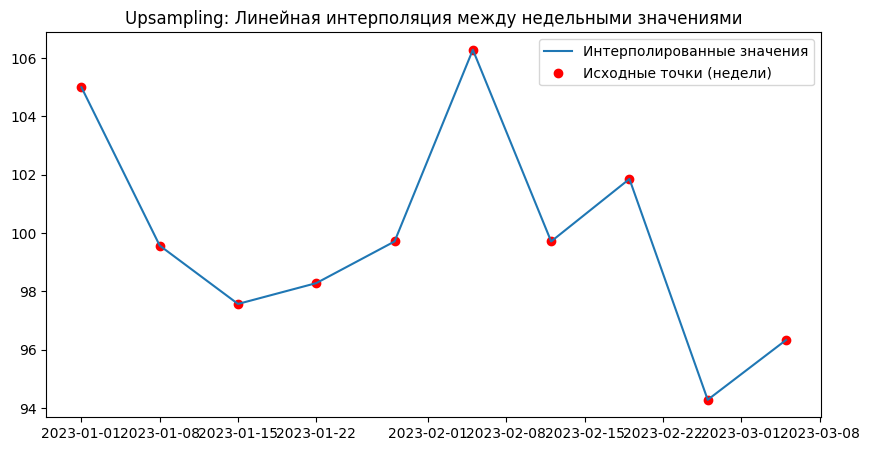

In [2]:
# Upsampling: из недельных -- в ежедневные значения
upsampled = weekly.resample('D').interpolate(method='linear')
plt.figure(figsize=(10, 5))
plt.plot(upsampled.index, upsampled['sales'], label='Интерполированные значения')
plt.scatter(weekly.index, weekly['sales'], label='Исходные точки (недели)', color='red')
plt.legend()
plt.title('Upsampling: Линейная интерполяция между недельными значениями')
plt.show()

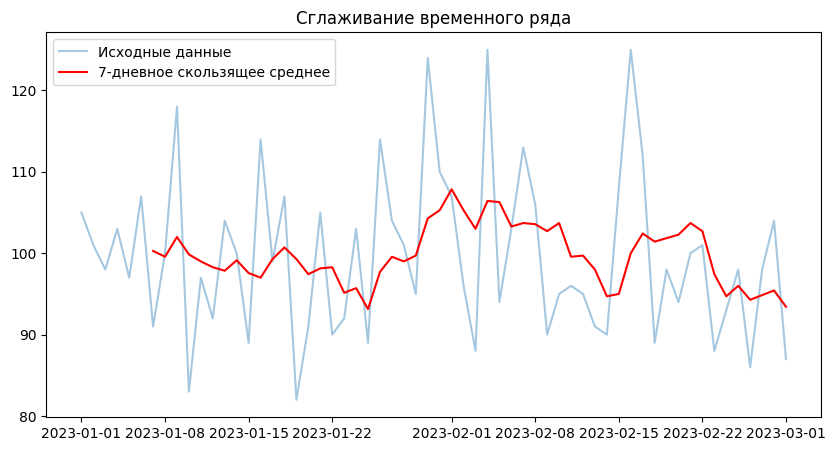

In [4]:
#Скользящее среднее за 7 дней
df['rolling_7'] = df['sales'].rolling(window=7).mean()
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sales'], alpha=0.4, label='Исходные данные')
plt.plot(df.index, df['rolling_7'], color='red', label='7-дневное скользящее среднее')
plt.legend()
plt.title('Сглаживание временного ряда')
plt.show()

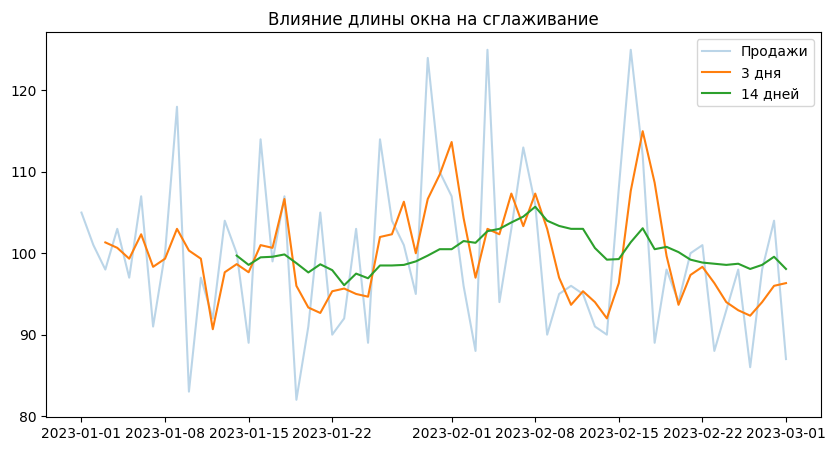

In [5]:
# Скользящее среднее за 3 дня
df['rolling_3'] = df['sales'].rolling(window=3).mean()

# Скользящее среднее за 14 дней
df['rolling_14'] = df['sales'].rolling(window=14).mean()

# Визуализация
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sales'], alpha=0.3, label='Продажи')
plt.plot(df['rolling_3'], label='3 дня')
plt.plot(df['rolling_14'], label='14 дней')
plt.legend()
plt.title('Влияние длины окна на сглаживание')
plt.show()

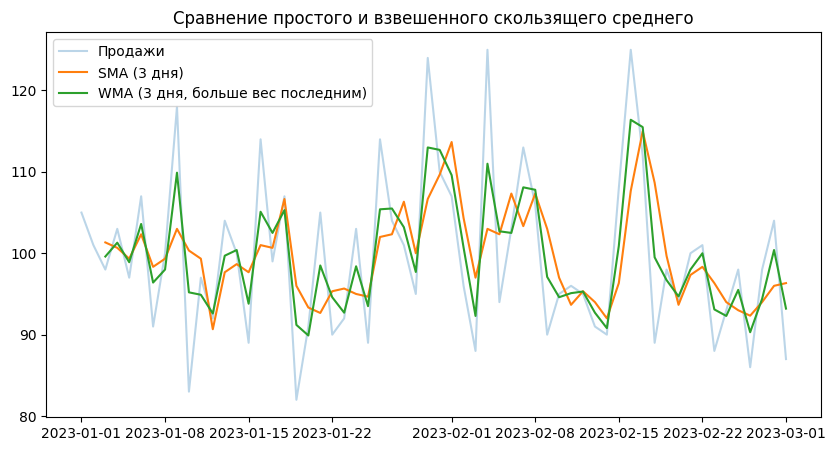

In [6]:
weights = [0.1, 0.3, 0.6]
df['wma_3'] = df['sales'].rolling(window=3).apply(lambda x: np.dot(x, weights), raw=True)
 
plt.figure(figsize=(10,5))
plt.plot(df['sales'], alpha=0.3, label='Продажи')
plt.plot(df['rolling_3'], label='SMA (3 дня)')
plt.plot(df['wma_3'], label='WMA (3 дня, больше вес последним)')
plt.legend()
plt.title('Сравнение простого и взвешенного скользящего среднего')
plt.show()

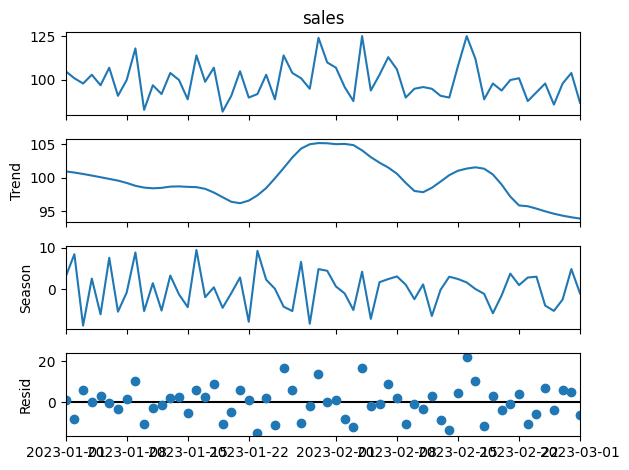

In [7]:
from statsmodels.tsa.seasonal import STL 
stl = STL(df['sales'], period=7)  # 7 -- если данные по дням и предполагается недельная сезонность
res = stl.fit()
 
res.plot()
plt.show()

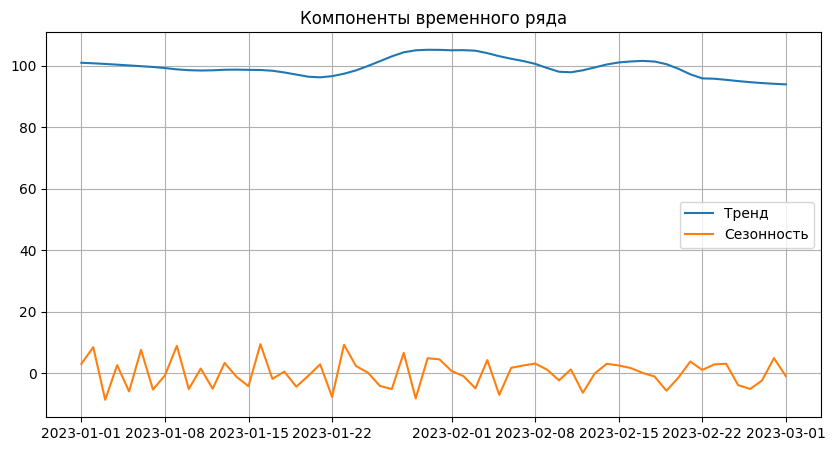

In [9]:
df['trend'] = res.trend
df['seasonal'] = res.seasonal
df['resid'] = res.resid
 
plt.figure(figsize=(10, 5))
plt.plot(df['trend'], label='Тренд')
plt.plot(df['seasonal'], label='Сезонность')
plt.legend()
plt.title('Компоненты временного ряда')
plt.grid(True)
plt.show() 


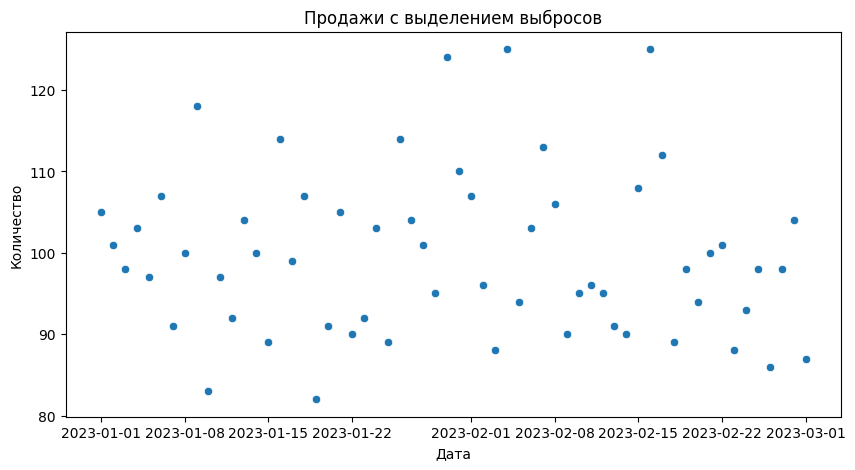

In [12]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=df.index, y=df['sales'])
plt.title('Продажи с выделением выбросов')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

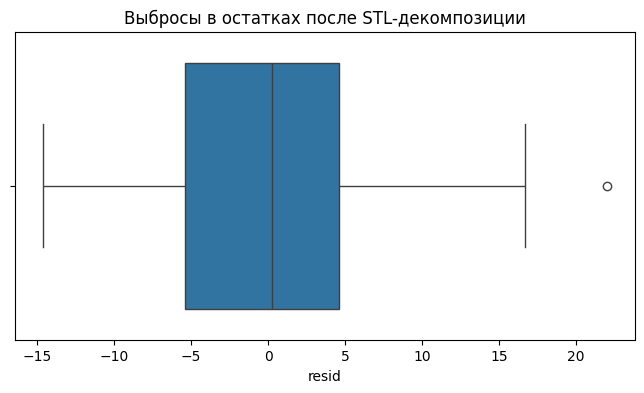

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['resid'])
plt.title('Выбросы в остатках после STL-декомпозиции')
plt.show()

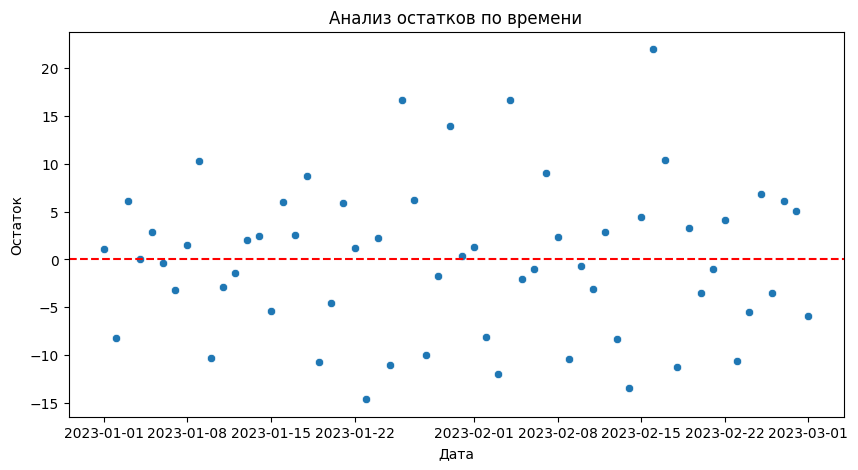

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.index, y=df['resid'])
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Анализ остатков по времени')
plt.xlabel('Дата')
plt.ylabel('Остаток')
plt.show()